## AIM :-  
------------------------------------
Describe and develop a fuzzy control systems where there are fuzzy input and output variables. Describe the rule base for the system. Then perform the inferencing for given specific values of input variables.

## Problem :- The Tipping Problem

Let’s create a fuzzy control system which models how we might choose to tip at a restaurant. When tipping, we consider the service and food quality, rated between 0 and 10. we use this to leave a tip of between 0 and 25%.

###### Formulate this problem :

* Antecednets (Inputs)

    * service

        * Universe : How good was the service of the wait staff, on a scale of 0 to 10?
        
        * Fuzzy set : poor, acceptable, amazing

    * food quality

        * Universe: How tasty was the food, on a scale of 0 to 10?

        * Fuzzy set: bad, decent, great

* Consequents (Outputs)

    * tip

        * Universe: How much should we tip, on a scale of 0% to 25%
            
        * Fuzzy set: low, medium, high

* Rules

    * IF the service was good or the food quality was good, THEN the tip will be high.

    * IF the service was average, THEN the tip will be medium.

    * IF the service was poor and the food quality was poor THEN the tip will be low.

* Control System Creation and Simulation

    * If I tell this controller that I rated:

        * the service as 9.8, and
        
        * the quality as 6.5,

    * it would recommend I leave:

        * a 19.84% tip.

##### Import Library 

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality') # Antecedent (input/sensor) variable for a fuzzy control system.
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service') # Antecedent (input/sensor) variable for a fuzzy control system.
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip') # Consequent (output/control) variable for a fuzzy control system.

In [4]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

In [5]:
quality

Antecedent: quality

In [6]:
service

Antecedent: service

In [7]:
tip

Consequent: tip

In [8]:
quality.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
service.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [11]:
# Custom membership functions can be built interactively with a familiar,Python API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

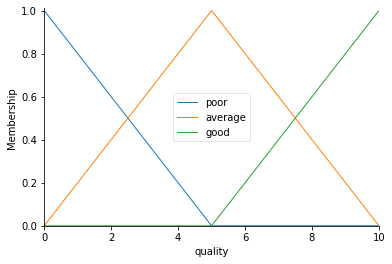

In [12]:
# We can see how these look with the help of .view() method
quality.view()

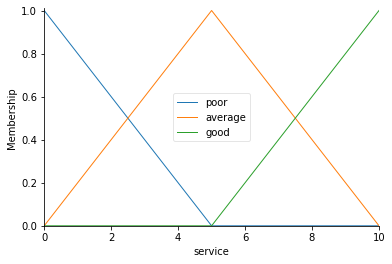

In [13]:
service.view()

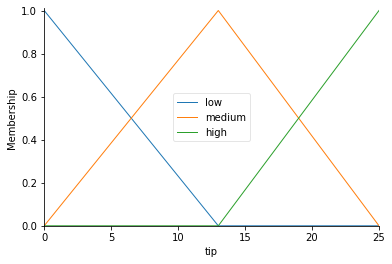

In [14]:
tip.view()

###### Fuzzy rules

we define the fuzzy relationship between input and output variables. 

Fuzzy rule example :-
    
    * If the food is good OR the service is good, then the tip will be high.
    
    * If the service is average, then the tip will be medium.

    * If the food is poor OR the service is poor, then the tip will be low.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1db22ebd3a0>)

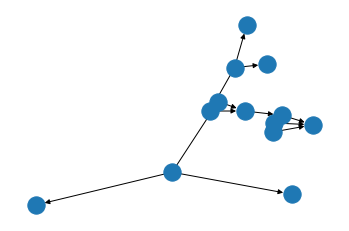

In [15]:
rule1 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])

rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1db22f4bdf0>)

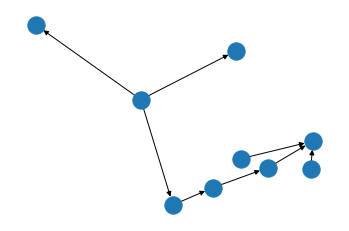

In [16]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1db22ebd3d0>)

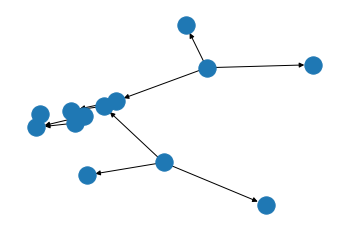

In [17]:
rule3.view()

###### Control System Creation and Simulation

In [18]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3]) #If provided, the system is initialized and populated with a set o fuzzy Rules

In [19]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl) #Calculate results from a ControlSystem.

In [20]:
# Pass inputs to the ControlSystem using Antecedent labels with Python API

# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()

In [23]:
print(tipping.output['tip'])

19.847607361963192


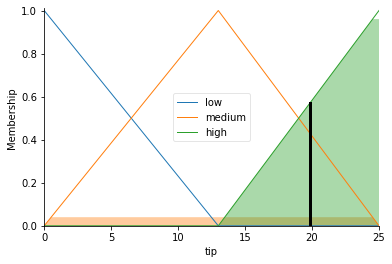

In [24]:
tip.view(sim=tipping)

The resulting suggested tip is 19.84%.